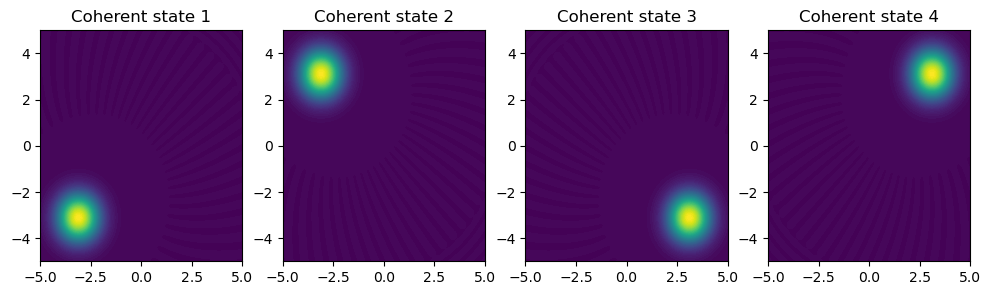

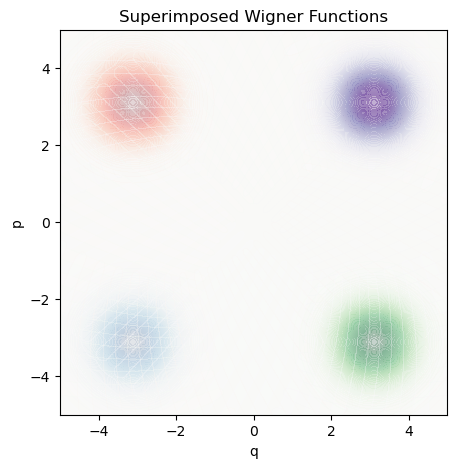

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from qutip.wigner import wigner


# Producing wigner plots for coherent state stationary solution 

systemSize = 40

# List of stationary solution (SS) values (location in complex plane found by mean field approx)
SS_cor = 2.2
SS_values = [- SS_cor - SS_cor*1j, - SS_cor + SS_cor*1j, + SS_cor - SS_cor*1j, + SS_cor + SS_cor*1j]

# Creating coherent state density matrix for each of the four SS
coherent_1 = qt.coherent_dm(systemSize, SS_values[0])
coherent_2 = qt.coherent_dm(systemSize, SS_values[1])
coherent_3 = qt.coherent_dm(systemSize, SS_values[2])
coherent_4 = qt.coherent_dm(systemSize, SS_values[3])

xvec = np.linspace(-5,5,200) # Generating grid in complex plane to calculate wigner function for 

# Generate wigner function for each density matrix 
W_coherent1 = wigner(coherent_1, xvec, xvec)
W_coherent2 = wigner(coherent_2, xvec, xvec)
W_coherent3 = wigner(coherent_3, xvec, xvec)
W_coherent4 = wigner(coherent_4, xvec, xvec)


# Plot the results
fig, axes = plt.subplots(1, 4, figsize=(12,3))
axes[0].contourf(xvec, xvec, W_coherent1, 100) 
axes[0].set_title("Coherent state 1")
axes[1].contourf(xvec, xvec, W_coherent2, 100) 
axes[1].set_title("Coherent state 2")
axes[2].contourf(xvec, xvec, W_coherent3, 100) 
axes[2].set_title("Coherent state 3")
axes[3].contourf(xvec, xvec, W_coherent4, 100) 
axes[3].set_title("Coherent state 4")
plt.show()

# Compute Wigner functions in array so they can be superimposed
W_coherent = [wigner(state, xvec, xvec) for state in coherent_states]

# Plot all Wigner functions on a single plot
fig, ax = plt.subplots(figsize=(5,5))

# Plot each Wigner function with different colours to differntiate
colors = ['Blues', 'Reds', 'Greens', 'Purples']
for i, W in enumerate(W_coherent):
    ax.contourf(xvec, xvec, W, 100, cmap=colors[i] , alpha=0.3)

ax.set_title("Superimposed Wigner Functions")
ax.set_xlabel("q")
ax.set_ylabel("p")

plt.show()

Loading saved data for alpha4...
Loading saved data for alpha2...
Loading saved data for alpha1...
Loading saved data for alpha3...


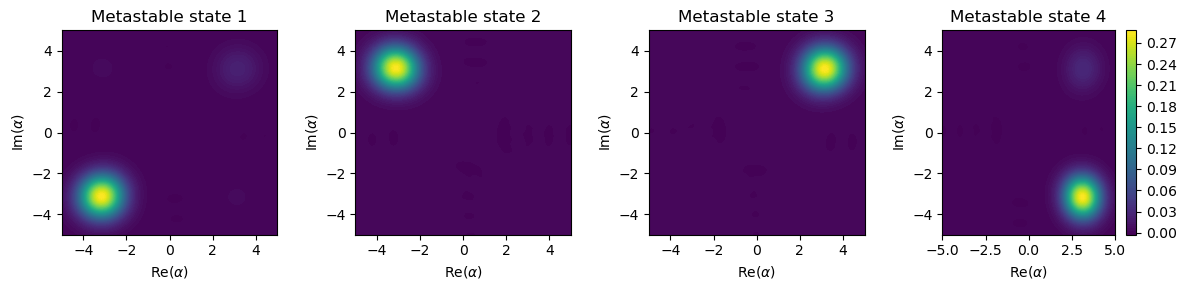

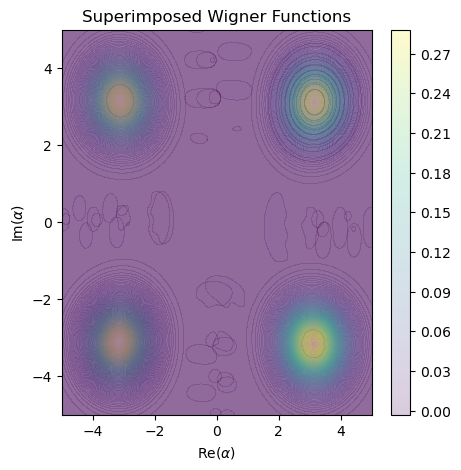

In [211]:
W_coherent = [] # Array for storing wigner representation data 
xvec = np.linspace(-5,5,200) # Generating grid in complex plane to calculate wigner function for 

# Alpha labels for loading in the data 
alpha_values = {
    'alpha1',
    'alpha2', 
    'alpha3',
    'alpha4'
}



for alpha_name in alpha_values: #Cycles through the four different sets of data corresponding to,
                                #,four different starting positions in complex plane
    print(f"Loading saved data for {alpha_name}...")

    # Load the full set of density matrices from the evolution under master equation 
    rho_matrices = np.load(f"raw_evolution_{alpha_name}m = 4, k = 4  H = 40, γ₁ = 1, γm = 0.01, eta = 0.5, Delta = 0.4 t = 0.01 to1000.0.npy")
    metastable_SS_rho = rho_matrices[600]  # Get the middle point of evolution should be at metastable SS 

    metastable_state = qt.Qobj(metastable_SS_rho) # Convert back to QuTiP density matrix
    metastable_state = wigner(metastable_state, xvec, xvec) # Generate corresponding wigner representation 
    W_coherent.append(metastable_state) # Append it to array for storing wigner representation data 

# Plot the results for each metastable SS individually

colours = ['Blues', 'Reds', 'Greens', 'Purples'] # Set of colours we can represent plots with

fig, axes = plt.subplots(1, 4, figsize=(12,3))
cs0 = axes[0].contourf(xvec, xvec, W_coherent[0], 100) 
axes[0].set_title("Metastable state 1")
axes[0].set_xlabel('Re('r'$\alpha$'')')
axes[0].set_ylabel('Im('r'$\alpha$'')')
#cbar = fig.colorbar(cs0)

cs1 = axes[1].contourf(xvec, xvec, W_coherent[1], 100) 
axes[1].set_title("Metastable state 2")
axes[1].set_xlabel('Re('r'$\alpha$'')')
axes[1].set_ylabel('Im('r'$\alpha$'')')
#cbar = fig.colorbar(cs1)

cs2 = axes[2].contourf(xvec, xvec, W_coherent[2], 100) 
axes[2].set_title("Metastable state 3")
axes[2].set_xlabel('Re('r'$\alpha$'')')
axes[2].set_ylabel('Im('r'$\alpha$'')')
#cbar = fig.colorbar(cs2)

cs3 = axes[3].contourf(xvec, xvec, W_coherent[3], 100) 
#axes[3].set_xlim([-4,0])
#axes[3].set_ylim([-4,0])
axes[3].set_title("Metastable state 4")
axes[3].set_xlabel('Re('r'$\alpha$'')')
axes[3].set_ylabel('Im('r'$\alpha$'')')
cbar = fig.colorbar(cs3)
plt.tight_layout()
plt.show()


# Superimpose all Wigner functions on a single plot
fig, ax = plt.subplots(figsize=(5,5))

# Plot each Wigner function with different transparencies

for i, W in enumerate(W_coherent):
    cs = ax.contourf(xvec, xvec, W, 100, cmap='viridis' , alpha=0.2)

cbar = fig.colorbar(cs)
ax.set_title("Superimposed Wigner Functions")
ax.set_xlabel('Re('r'$\alpha$'')')
ax.set_ylabel('Im('r'$\alpha$'')')
plt.savefig('Superimposed metastable state wigner functions.png') 
plt.show()

Loading saved data for alpha4...
Loading saved data for alpha2...
Loading saved data for alpha1...
Loading saved data for alpha3...


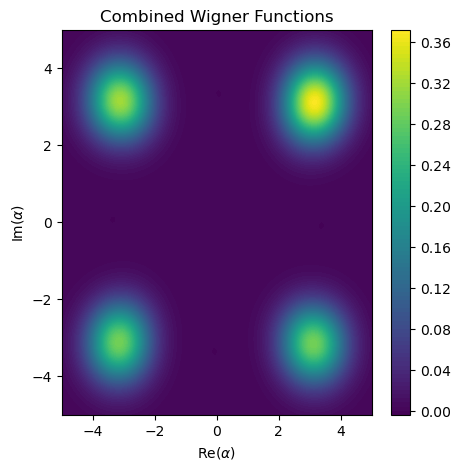

In [215]:
# Combining all wigner representations to plot together 

w = 200

W_coherent = np.zeros([w,w]) # Create array of zeros with same dimensions as wigner representations so they can be added together 

for alpha_name in alpha_values:
    print(f"Loading saved data for {alpha_name}...")

    # Load the full set of density matrices from the evolution under master equation 
    rho_matrices = np.load(f"raw_evolution_{alpha_name}m = 4, k = 4  H = 40, γ₁ = 1, γm = 0.01, eta = 0.5, Delta = 0.4 t = 0.01 to1000.0.npy")
    metastable_SS_rho = rho_matrices[600]  # Get the middle point of evolution should be at metastable SS 

    metastable_state = qt.Qobj(metastable_SS_rho) # Convert back to QuTiP density matrix
    metastable_state = wigner(metastable_state, xvec, xvec) # Generate corresponding wigner representation 
    W_coherent += metastable_state

# Plot the combination of wigner representations of the metastable SS 

fig, ax = plt.subplots(figsize=(5,5))
cs0 = ax.contourf(xvec, xvec, W_coherent, 100) 
ax.set_title("Metastable state 1")
ax.set_xlabel('Re('r'$\alpha$'')')
ax.set_ylabel('Im('r'$\alpha$'')')
cbar = fig.colorbar(cs0)
ax.set_title("Combined Wigner Functions")
plt.savefig('Combined metastable state wigner functions.png') 
plt.show()